#Extraindo base

In [1]:
import pandas as pd

In [2]:
caminho = 'https://raw.githubusercontent.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/main/Dia_1-Importando_dados/Datasets/dados_emprestimos/emprestimos-'
lista_caminho = ['20101','20102','20111','20112',
                 '20121','20122','20131','20132',
                 '20141','20142','20151','20152',
                 '20161','20162','20171','20172',
                 '20181','20182','20191','20192',
                 '20201']
url = []

for i in range(len(lista_caminho)):
  url.append(f"{caminho}{lista_caminho[i]}.csv")

  if i == 0:
    dados = pd.read_csv(url[i])
    dados['base'] = lista_caminho[i]
  else:
    df = pd.read_csv(url[i])
    df['base'] = lista_caminho[i]
    dados = pd.concat([dados,df], ignore_index=True)



In [3]:
caminho = 'https://github.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/raw/main/Dia_1-Importando_dados/Datasets/dados_exemplares.parquet'
df_parquet = pd.read_parquet(caminho)


In [4]:
df_parquet.head()

,id_exemplar,codigo_barras,colecao,biblioteca,status_material,localizacao,registro_sistema
index,,,,,,,
0,5,L000003,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,694,1
1,4,L000002,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,688,1
2,3,L000001,Acervo Circulante,Biblioteca Central Zila Mamede,ESPECIAL,638,1
3,7,L000114,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,616,5
5,10,L000041,Acervo Circulante,Biblioteca Central Zila Mamede,ESPECIAL,657,15


#Linhas e colunas

In [5]:
dados.shape

(2258018, 8)

#Nulos

In [6]:
dados.isnull().sum()

id_emprestimo                 0
codigo_barras                 0
data_renovacao          1285720
data_emprestimo               0
data_devolucao             6471
matricula_ou_siape         3170
tipo_vinculo_usuario          0
base                          0
dtype: int64

#Tipo de dados

In [7]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2258018 entries, 0 to 2258017
Data columns (total 8 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id_emprestimo         int64  
 1   codigo_barras         object 
 2   data_renovacao        object 
 3   data_emprestimo       object 
 4   data_devolucao        object 
 5   matricula_ou_siape    float64
 6   tipo_vinculo_usuario  object 
 7   base                  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 137.8+ MB


#Remover duplicados

In [8]:
dados.duplicated().sum()
dados.drop_duplicates(inplace = True)

In [9]:
dados.duplicated().sum()

0

In [10]:
df_parquet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 546237 entries, 0 to 568584
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id_exemplar       546237 non-null  int64 
 1   codigo_barras     546237 non-null  object
 2   colecao           546237 non-null  object
 3   biblioteca        546237 non-null  object
 4   status_material   546237 non-null  object
 5   localizacao       546237 non-null  int64 
 6   registro_sistema  546237 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 33.3+ MB


#Merge

In [11]:
dados_unificado = pd.merge(dados,df_parquet, on = 'codigo_barras')

In [12]:
dados_unificado.isnull().sum()

id_emprestimo                 0
codigo_barras                 0
data_renovacao          1162077
data_emprestimo               0
data_devolucao             6178
matricula_ou_siape         2893
tipo_vinculo_usuario          0
base                          0
id_exemplar                   0
colecao                       0
biblioteca                    0
status_material               0
localizacao                   0
registro_sistema              0
dtype: int64

In [13]:
dados_unificado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2072522 entries, 0 to 2072521
Data columns (total 14 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id_emprestimo         int64  
 1   codigo_barras         object 
 2   data_renovacao        object 
 3   data_emprestimo       object 
 4   data_devolucao        object 
 5   matricula_ou_siape    float64
 6   tipo_vinculo_usuario  object 
 7   base                  object 
 8   id_exemplar           int64  
 9   colecao               object 
 10  biblioteca            object 
 11  status_material       object 
 12  localizacao           int64  
 13  registro_sistema      int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 237.2+ MB


In [14]:
print(dados.shape,df_parquet.shape,dados_unificado.shape)

(2257981, 8) (546237, 7) (2072522, 14)


In [15]:
dados_unificado['data_devolucao'] = pd.to_datetime(dados_unificado['data_devolucao'], format='%Y/%m/%d')
dados_unificado['data_emprestimo'] = pd.to_datetime(dados_unificado['data_emprestimo'], format='%Y/%m/%d')
dados_unificado['data_renovacao'] = pd.to_datetime(dados_unificado['data_renovacao'], format='%Y/%m/%d')


<Axes: xlabel='base'>

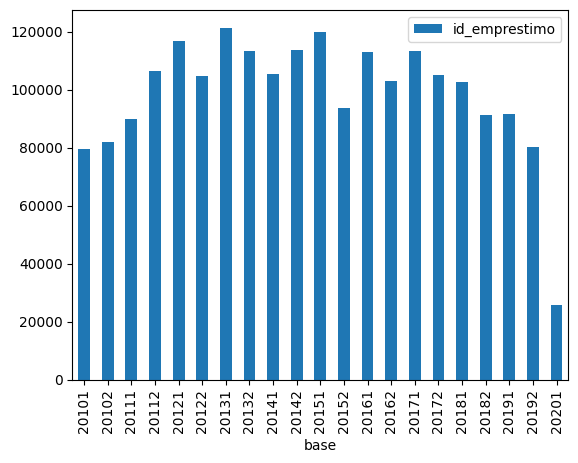

In [16]:
dados_unificado.groupby('base')[['id_emprestimo']].count().plot(kind='bar')